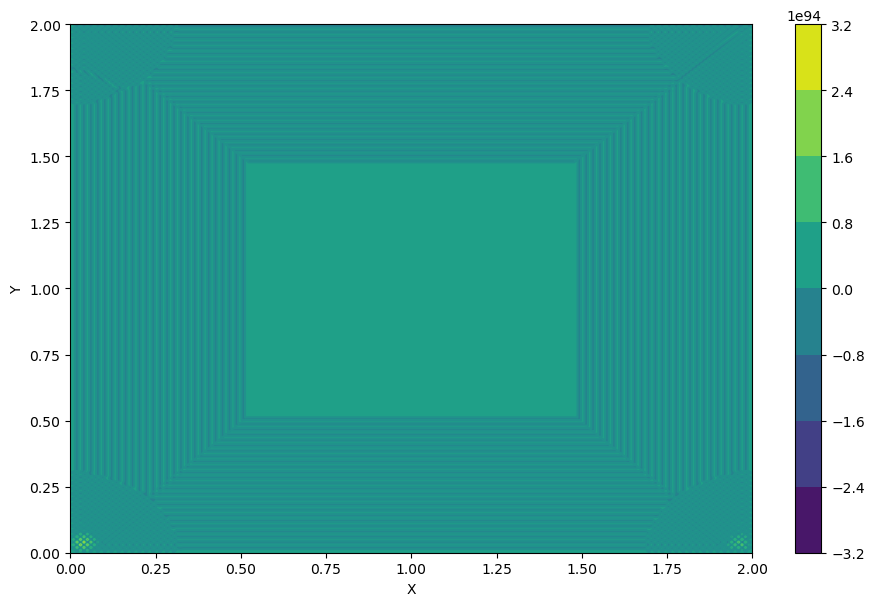

In [1]:
# teste calor
# Library

import numpy                           
from matplotlib import pyplot     



# Grid Generation

nx = 200
ny = 200                                    
dx = 2 / (nx-1)
dy = 2 / (ny-1)

# Time Step

nt = 50                                                                   
alpha = 1                                 
dt = 0.001                     

# Initial Condition (I.C) and Boundry Condition (B.C)

T = numpy.ones((nx, ny))                         # I.C (U = Velocity)
x = numpy.linspace(0,2,nx)                       # B.C
y = numpy.linspace(0,2,ny)                       # B.C

Tn = numpy.empty_like(T)                         #initialize a temporary array
X, Y = numpy.meshgrid(x,y)

T[0, :] = 20          #  B.C
T[-1,:] = -100        #  B.C
T[:, 0] = 150         #  B.C
T[:,-1] = 100         #  B.C
# Solver
###Run through nt timesteps
    
for n in range(nt + 1): 
    Tn = T.copy()
        
    T[1:-1, 1:-1] = (Tn[1:-1,1:-1] + 
                        ((alpha * dt / dx**2) * 
                        (Tn[1:-1, 2:] - 2 * Tn[1:-1, 1:-1] + Tn[1:-1, 0:-2])) +
                        ((alpha * dt / dy**2) * 
                        (Tn[2:,1: -1] - 2 * Tn[1:-1, 1:-1] + Tn[0:-2, 1:-1])))
        
    T[0, :] = 20          # From B.C
    T[-1,:] = -100        # From B.C
    T[:, 0] = 150         # From B.C
    T[:,-1] = 100         # From B.C

   
fig = pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.contourf(X, Y, T)
pyplot.colorbar()
pyplot.contour(X, Y, T)
pyplot.xlabel('X')
pyplot.ylabel('Y');

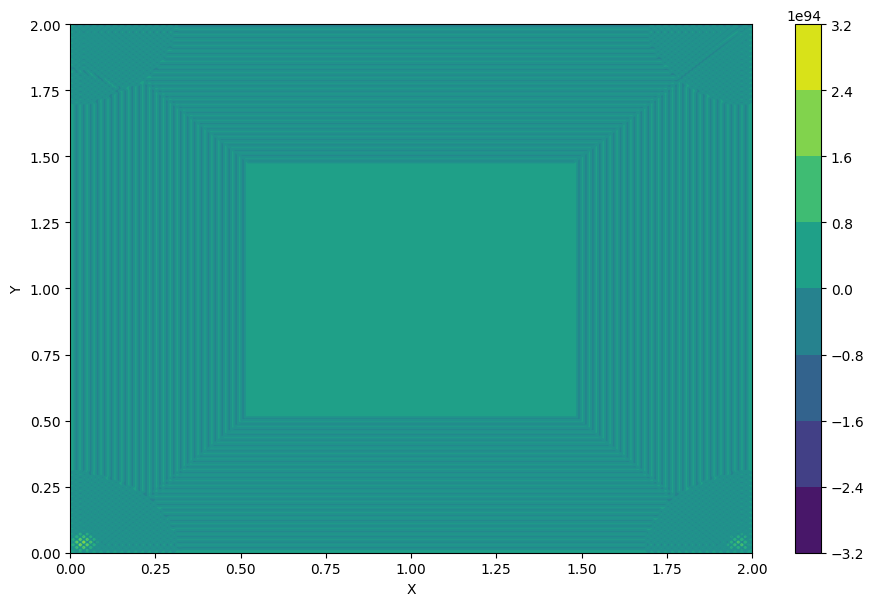

In [5]:
# Library

import numpy                           
from matplotlib import pyplot     



# Grid Generation

nx = 200
ny = 200                                    
dx = 2 / (nx-1)
dy = 2 / (ny-1)

# Time Step

nt = 50                                                                   
alpha = 1                                 
dt = 0.001                     

# Initial Condition (I.C) and Boundry Condition (B.C)

T = numpy.ones((nx, ny))                         # I.C (U = Velocity)
x = numpy.linspace(0,2,nx)                       # B.C
y = numpy.linspace(0,2,ny)                       # B.C

Tn = numpy.empty_like(T)                         #initialize a temporary array
X, Y = numpy.meshgrid(x,y)

T[0, :] = 20          #  B.C
T[-1,:] = -100        #  B.C
T[:, 0] = 150         #  B.C
T[:,-1] = 100         #  B.C
# Solver
###Run through nt timesteps
    
for n in range(nt + 1): 
    Tn = T.copy()
        
    T[1:-1, 1:-1] = (Tn[1:-1,1:-1] + 
                        ((alpha * dt / dx**2) * 
                        (Tn[1:-1, 2:] - 2 * Tn[1:-1, 1:-1] + Tn[1:-1, 0:-2])) +
                        ((alpha * dt / dy**2) * 
                        (Tn[2:,1: -1] - 2 * Tn[1:-1, 1:-1] + Tn[0:-2, 1:-1])))
        
    T[0, :] = 20          # From B.C
    T[-1,:] = -100        # From B.C
    T[:, 0] = 150         # From B.C
    T[:,-1] = 100         # From B.C

   
fig = pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.contourf(X, Y, T)
pyplot.colorbar()
pyplot.contour(X, Y, T)
pyplot.xlabel('X')
pyplot.ylabel('Y');

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

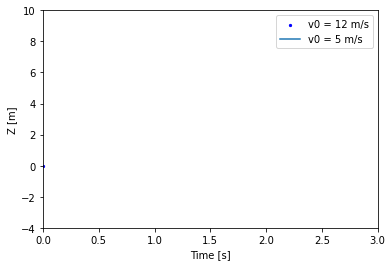

In [3]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()